In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

%matplotlib inline

In [2]:
df_1 = 'df_final_demo.csv'
df_2= 'df_final_experiment_clients.csv'
df_3 = 'df_final_web_data_merged.csv'

#df_t1 = 'df_final_web_data_pt_1.csv'

df_fd = pd.read_csv(df_1)
df_fe_c = pd.read_csv(df_2)
df_fw_dm = pd.read_csv(df_3)
#df_p1 = pd.read_csv(df_t1)


C:\Users\aj824\AppData\Local\Temp\ipykernel_6572\688577527.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fw_dm = pd.read_csv(df_3)


In [3]:
df_fw_dm

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755402,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755403,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755404,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [4]:
df_fe_c

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


The marked client ID's are the one that were in the test, the others were not in the test

In [5]:
df_fd

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [6]:
df_fw_dm.isnull().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [7]:
df_fw_dm

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755402,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755403,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755404,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [43]:
df_fw_dm.drop([343141], inplace = True)

In [8]:
# use this to change the scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)
df_fd.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,70609.00,5004991.88,2877277.63,169.00,2519329.00,5016978.00,7483085.00,9999839.00
clnt_tenure_yr,70595.00,12.05,6.87,2.00,6.00,11.00,16.00,62.00
clnt_tenure_mnth,70595.00,150.66,82.09,33.00,82.00,136.00,192.00,749.00
clnt_age,70594.00,46.44,15.59,13.50,32.50,47.00,59.00,96.00
num_accts,70595.00,2.26,0.53,1.00,2.00,2.00,2.00,8.00
bal,70595.00,147445.24,301508.71,13789.42,37346.83,63332.90,137544.90,16320040.15
calls_6_mnth,70595.00,3.38,2.24,0.00,1.00,3.00,6.00,7.00
logons_6_mnth,70595.00,5.57,2.35,1.00,4.00,5.00,7.00,9.00


In [10]:
df_sub = df_fd[df_fd['bal'].isnull()]

In [11]:
df_sub

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth


In [12]:
df_fd.dropna(inplace = True)

In [13]:
df_fd.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [14]:
df_fd = df_fd.astype({'clnt_tenure_yr': int,'clnt_tenure_mnth': int,'clnt_age': int,'calls_6_mnth': int,'logons_6_mnth': int,'num_accts': int })


In [15]:
df_fd

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6,73,60,U,2,45105.30,6,9
1,2304905,7,94,58,U,2,110860.30,6,9
2,1439522,5,64,32,U,2,52467.79,6,9
3,1562045,16,198,49,M,2,67454.65,3,6
4,5126305,12,145,33,F,2,103671.75,0,3
...,...,...,...,...,...,...,...,...,...
70604,7993686,4,56,38,U,3,1411062.68,5,5
70605,8981690,12,148,31,M,2,101867.07,6,6
70606,333913,16,198,61,F,2,40745.00,3,3
70607,1573142,21,255,68,M,3,475114.69,4,4


In [16]:
df_fe_c.isnull().sum()

client_id        0
Variation    20109
dtype: int64

In [17]:
df_fe_c.dropna(inplace = True)

In [21]:
df_fe_c.rename(columns={'Variation':'variation'}, inplace = True)

In [22]:
df_fe_c.describe(include='all')

,client_id,variation
count,50500.00,50500
unique,NaN,2
top,NaN,Test
freq,NaN,26968
mean,5006179.06,NaN
std,2877442.53,NaN
min,555.00,NaN
25%,2515645.75,NaN
50%,5025103.50,NaN
75%,7477933.25,NaN


In [26]:
df_fd['gendr'].replace({'X','U'}, inplace = True)

C:\Users\aj824\AppData\Local\Temp\ipykernel_6572\1498198497.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fd['gendr'].replace({'X': 'U'}, inplace = True)


### Visualizations

**Categorical Values**

In [23]:
frequency_table = df_fe_c['variation'].value_counts()
proportion_table = df_fe_c['variation'].value_counts(normalize=True)

frequency_table, proportion_table

(variation
 Test       26968
 Control    23532
 Name: count, dtype: int64,
 variation
 Test      0.53
 Control   0.47
 Name: proportion, dtype: float64)

In [27]:
frequency_gender = df_fd['gendr'].value_counts()
proportion_gender = df_fd['gendr'].value_counts(normalize=True)
frequency_gender, proportion_gender

(gendr
 U    24125
 M    23724
 F    22745
 Name: count, dtype: int64,
 gendr
 U   0.34
 M   0.34
 F   0.32
 Name: proportion, dtype: float64)

In [44]:
frequency_process_steps = df_fw_dm['process_step'].value_counts()
proportion_process_steps = df_fw_dm['process_step'].value_counts(normalize=True)
frequency_process_steps, proportion_process_steps

(process_step
 start      243945
 step_1     163193
 step_2     133062
 step_3     112242
 confirm    102963
 Name: count, dtype: int64,
 process_step
 start     0.32
 step_1    0.22
 step_2    0.18
 step_3    0.15
 confirm   0.14
 Name: proportion, dtype: float64)

C:\Users\aj824\AppData\Local\Temp\ipykernel_6572\1484790106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3");


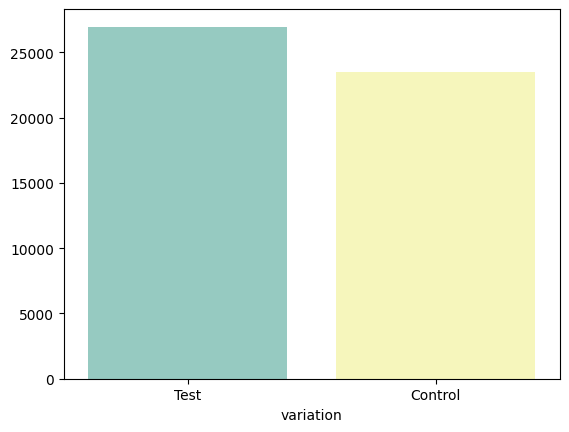

In [28]:
# Plotting a bar chart using the values from the frequency table, with colors sourced from the "Set3" palette
sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3");

C:\Users\aj824\AppData\Local\Temp\ipykernel_6572\4120208587.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_gender.index, y=frequency_gender.values, palette="Set3");


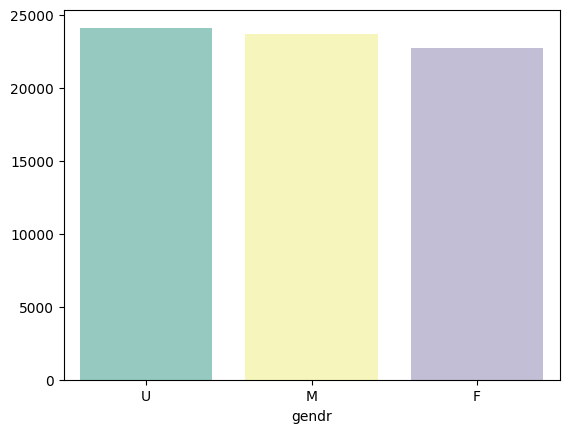

In [34]:
# Plotting a bar chart using the values from the frequency gender table, with colors sourced from the "Set3" palette
sns.barplot(x=frequency_gender.index, y=frequency_gender.values, palette="Set3");

C:\Users\aj824\AppData\Local\Temp\ipykernel_6572\920025877.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_process_steps.index, y=frequency_process_steps.values, palette="Set3");


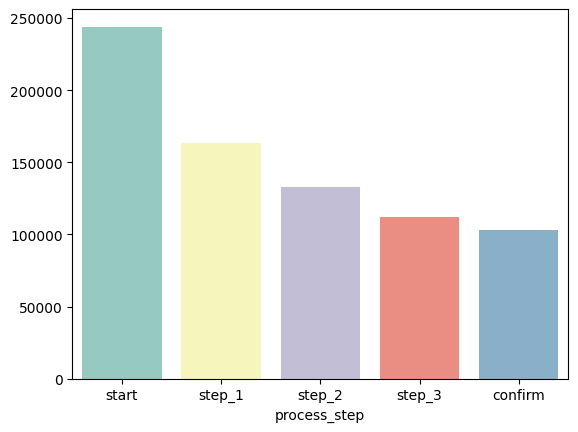

In [45]:
# Plotting a bar chart using the values from the frequency process steps table, with colors sourced from the "Set3" palette
sns.barplot(x=frequency_process_steps.index, y=frequency_process_steps.values, palette="Set3");

**Numerical Values**

In [46]:
demographic_numerical = df_fd.select_dtypes("number")
demographic_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,70594.00,5005025.75,2877289.31,169.00,2519542.75,5016973.50,7483074.25,9999839.00
clnt_tenure_yr,70594.00,12.05,6.87,2.00,6.00,11.00,16.00,62.00
clnt_tenure_mnth,70594.00,150.66,82.09,33.00,82.00,136.00,192.00,749.00
clnt_age,70594.00,46.18,15.60,13.00,32.00,47.00,59.00,96.00
num_accts,70594.00,2.26,0.53,1.00,2.00,2.00,2.00,8.00
bal,70594.00,147446.73,301510.58,13789.42,37346.60,63334.59,137546.12,16320040.15
calls_6_mnth,70594.00,3.38,2.24,0.00,1.00,3.00,6.00,7.00
logons_6_mnth,70594.00,5.57,2.35,1.00,4.00,5.00,7.00,9.00


**Shape of distribution**

In [47]:
client_age_skewness = demographic_numerical['clnt_age'].skew()
client_age_kurtosis = demographic_numerical['clnt_age'].kurtosis()

client_age_skewness, client_age_kurtosis

(0.08294227402556785, -0.9239629855316349)

<Axes: xlabel='clnt_age', ylabel='Count'>

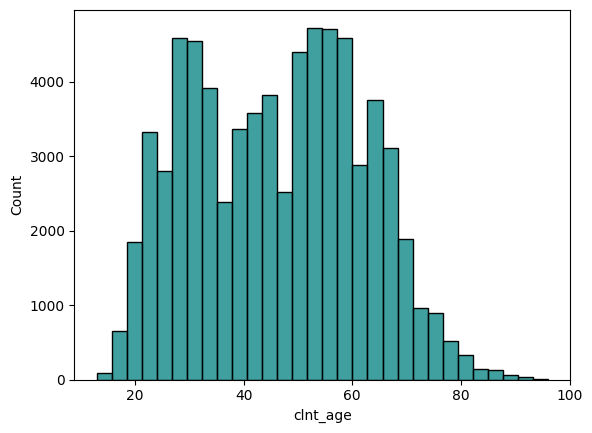

In [60]:
sns.histplot(demographic_numerical['clnt_age'], bins=30, color="teal")

<Axes: ylabel='clnt_age'>

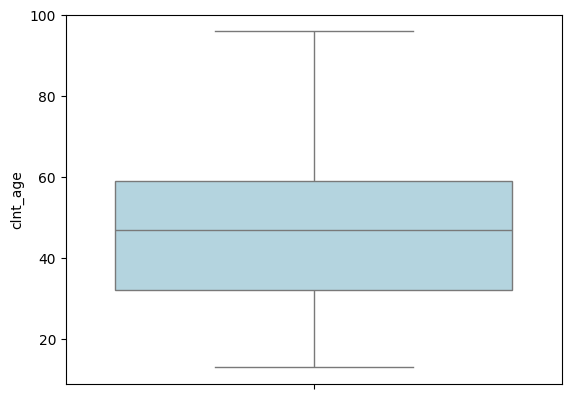

In [56]:
sns.boxplot(data = demographic_numerical['clnt_age'], color="lightblue")

In [52]:
year_tenure_skewness = demographic_numerical['clnt_tenure_yr'].skew()
year_tenure_kurtosis = demographic_numerical['clnt_tenure_yr'].kurtosis()

year_tenure_skewness, year_tenure_kurtosis

(1.0366247018480386, 1.0709232170805043)

<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

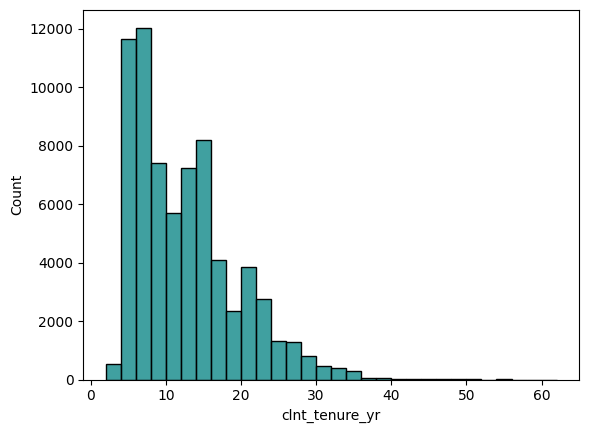

In [62]:
sns.histplot(demographic_numerical['clnt_tenure_yr'], bins=30, color="teal")

<Axes: ylabel='clnt_tenure_yr'>

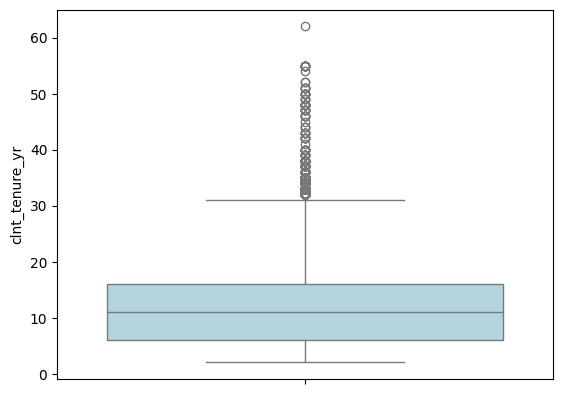

In [57]:
sns.boxplot(data = demographic_numerical['clnt_tenure_yr'], color="lightblue")

In [55]:
month_tenure_skewness = demographic_numerical['clnt_tenure_mnth'].skew()
month_tenure_kurtosis = demographic_numerical['clnt_tenure_mnth'].kurtosis()

month_tenure_skewness, month_tenure_kurtosis

(1.0506517922170102, 1.102446928017626)

<Axes: xlabel='clnt_tenure_mnth', ylabel='Count'>

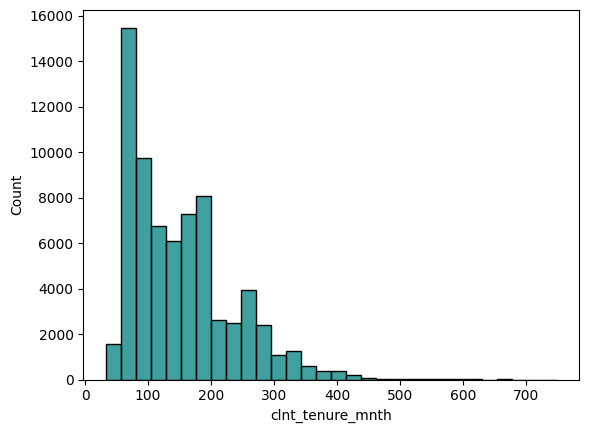

In [61]:
sns.histplot(demographic_numerical['clnt_tenure_mnth'], bins=30, color="teal")

<Axes: ylabel='clnt_tenure_mnth'>

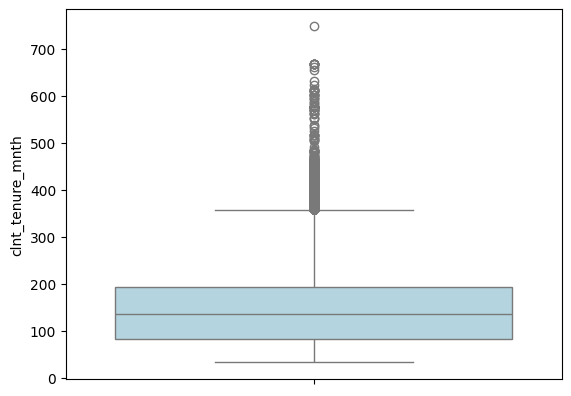

In [59]:
sns.boxplot(data = demographic_numerical['clnt_tenure_mnth'], color="lightblue")